## Convolutional Neural Networks (CNN's)
Powerful deep networks that are widely used in image related tasks like - Image Recognition, Segmenation, Computer Vision etc Input to these networks are images!

<img src="Dataset/Images/cnn2.jpeg"
     alt="pokemon_back.jpg"
     style="width: 400px;" />


### Why another type of Networks?
Problem with Multilayer Perceptrons(MLP's)
<img src="Dataset/Images/cnn.jpeg"
     alt="pokemon_back.jpg"
     style="width: 400px;" />

- **Overfitting** due too many parameters(~millions), while working with medium-large sized images!
- Fail to handle variance in images - translation, rotation, illumination, size etc!


<img src="Dataset/Images/invariance.png"
     alt="pokemon_back.jpg"
     style="width: 400px;" />
        

### Why CNN's are special?



<center>Let's have a look out this image!</center>
<img src="Dataset/Images/cat.jpg"
     alt="cat.jpg"
     style="width: 300px; height: 200px;" />
<br><br>
<center>CNN know's this is a cat.</center>
<img src="Dataset/Images/cat1.jpg"
     alt="cat.jpg"
     style="width: 300px; height: 200px;" />
<br><br>
<center>Even this is a cat.</center>
<img src="Dataset/Images/cat2.jpg"
     alt="cat.jpg"
     style="width: 300px; height: 200px;" />
<br><br>
<center>This a cat too.</center>
<img src="Dataset/Images/cat3.jpg"
     alt="cat.jpg"
     style="width: 300px; height: 200px;" />
<br><br>
<center>and this too!</center>
<img src="Dataset/Images/cat4.jpg"
     alt="cat.jpg"
     style="width: 300px; height: 200px;" />

## How does it happen? It's like Template Matching!

<img src="Dataset/Images/conv.jpg"
     alt="cat.jpg"
     style="width: 600px; height: 300px;" />

### Let's understand Convolution
<img src="Dataset/Images/Convolution_schematic.gif"
     alt="cat.jpg"
     style="width: 400px;" />

## Convolution layer?
- Convolution Layers are made up of filters
- but what are these filters?


### Code Example

Understanding "Filters" and "Convolution"

When the feature is present in part of an image, the convolution operation between the filter and that part of the image results in a real number with a high value. If the feature is not present, the resulting value is low.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

In [2]:
def drawImg(img, title="Image "):
    plt.figure(figsize=(3,3))
    plt.imshow(img, cmap='gray')
    plt.style.use("seaborn")
    plt.axis("off")
    plt.title(title + str(img.shape))
    plt.show()

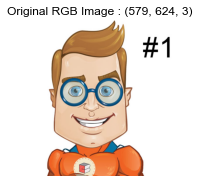

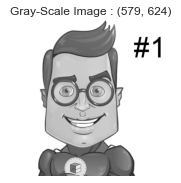

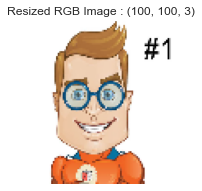

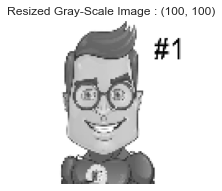

In [3]:
img_ = cv2.imread("Dataset/Images/cody2.jpg") # BGR
img_ = cv2.cvtColor(img_, cv2.COLOR_BGR2RGB) # RGB
img = cv2.resize(img_, (100, 100))
img_gray = cv2.cvtColor(img_, cv2.COLOR_BGR2GRAY)
img_gray_scaled = cv2.resize(img_gray, (100, 100))
drawImg(img_, "Original RGB Image : ")
drawImg(img_gray, "Gray-Scale Image : ")
drawImg(img, "Resized RGB Image : ")
drawImg(img_gray_scaled, "Resized Gray-Scale Image : ")

- Gray Scale Image -> 2D Filter (F x F)
- RGB Image -> 3D Filter (F x F x 3)

In [4]:
# Hardcoded Filters
def convolution(img, img_filter):
    
    W = img.shape[0]
    H = img.shape[1]
    
    F = img_filter.shape[0] # Assume Square Filters (F x F)
    
    new_img = np.zeros((W-F+1, H-F+1))
    
    for row in range(W-F+1):
        for col in range(H-F+1):
            # Outer Two Loops Iterate Over The New Image
            # Inner Two Loops Iterate Over The Filter
            for i in range(F):
                for j in range(F):
                    new_img[row][col] += img[row+i][col+j] * img_filter[i][j]
                    
            if new_img[row][col] > 255:
                new_img[row][col] = 255
            elif new_img[row][col] < 0:
                new_img[row][col] = 0
                    
    return new_img # Activation Map

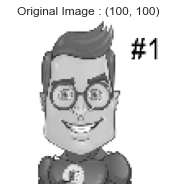

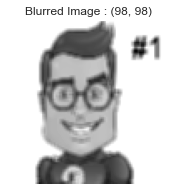

In [5]:
# Blur Filter -> When you take average of pixels, image gets blurred
blur_filter = np.ones((3,3))/9.0
# print(blur_filter)

output_1 = convolution(img_gray_scaled, blur_filter)
drawImg(img_gray_scaled, "Original Image : ")
drawImg(output_1, "Blurred Image : ")

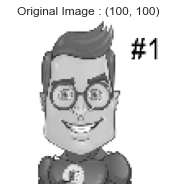

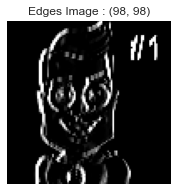

In [6]:
# Edge Filter
edge_filter = np.array([[1,0,-1],[1,0,-1],[1,0,-1]])
output_2 = convolution(img_gray_scaled, edge_filter)
drawImg(img_gray_scaled, "Original Image : ")
drawImg(output_2, "Edges Image : ")

- Extracting Features Of Image Using Filters 
- So Filters can Highlight "Features" that can be Useful to Classify Images.
- Color is Not Always Important, Features Like Edges Help in Detecting Objects!

### Buzzwords in CNN's
- Convolution Layer
- Valid vs Same Convolution
- Padding
- Stride
- Filters/Kernels
- Pooling (Average/Maxpooling)

### Convolution Layer

 - Contains Various Filters
 - Each Filter Extracts Different Kinds of Features And Gives 1 Activation Map
 - Multiple Activation Maps Are Combined by Stacking to Form Output Volume
 - So CNN Layer Takes Input A Volume And Produces An Output Volume of Different Shape

In [7]:
%%HTML
<div align="middle">
<video width="100%" controls>
      <source src="Dataset/Images/conv_kiank.mp4" type="video/mp4">
</video></div>

### Stride
- Filters can have different size as well as movement
- Stride defines how a filter should move across the image
- No of pixels we skip each time is called stride
- In our example we used a stride of (1,1) along W and H
- You can also use a stride of (2,2) in that case the output volume will have less W and H

**Input and Output Sizes**:
(assuming 0 padding)
$$ n_H = \lfloor \frac{n_{H_{prev}} - f}{stride} \rfloor +1 $$
$$ n_W = \lfloor \frac{n_{W_{prev}} - f}{stride} \rfloor +1 $$
$$ n_C = n_{C_{prev}}$$

<img src="Dataset/Images/Convolution_schematic.gif"
     alt="cat.jpg"
     style="width: 400px;" />


### Padding
- Convolution operation we have seen reduces "H" and "W" of original image
- But sometimes we want the output image to have same size as input image
- So we can achieve this by adding 0 value pixels(neurons) outside the original image
- This is called Padding

**Input and Output Sizes after Convolution**:
(with padding)



$$ n_H = \lfloor \frac{n_{H_{prev}} - f + 2 \times pad}{stride} \rfloor +1 $$
$$ n_W = \lfloor \frac{n_{W_{prev}} - f + 2 \times pad}{stride} \rfloor +1 $$
$$ n_C = \text{number of filters used in the convolution}$$

### Padding Example
Padding using [Numpy](https://docs.scipy.org/doc/numpy/reference/generated/numpy.pad.html)

<img src="Dataset/Images/cody_pad.jpg"
     alt="cat.jpg"
     style="width: 600px; height: 600px;" />

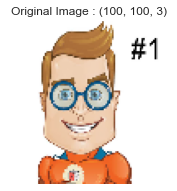

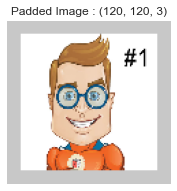

In [8]:
drawImg(img, "Original Image : ")

# Padding To This Image
pad_img = np.pad(img, ((10,10),(10,10),(0,0)), 'constant', constant_values=200)
# ((Row),(Col),(Channel))
# We do padding along Height and Width
drawImg(pad_img, "Padded Image : ")

## Pooling Layers
- Pooling is performed after Convolution Operation
- Two types of pooling layer - Average Pooling and Max Pooling

- **Max-pooling layer**: slides an ($f, f$) window over the input and stores the max value of the window in the output.

- **Average-pooling layer**: slides an ($f, f$) window over the input and stores the average value of the window in the output.

- It helps to reduce computation by discarding 75% of the neurons(assuming 2X2 filters with stride of 2)
- Makes feature detectors more robust
- No parameters for learning, only hyperparameters such as filter size.
<img src="Dataset/Images/mp.png"
     alt="cat.jpg"
     style="width: 400px;" />

# Implement Pooling Operation

In [9]:
X = np.array([[1,0,2,3],[4,6,6,8],[3,1,1,0],[1,2,2,4]])

def pooling(X, mode="max"):
    
    stride = 2
    f = 2
    
    H, W = X.shape
    HO = int((H-f)/stride) + 1
    WO = int((W-f)/stride) + 1
    
    output = np.zeros((HO,WO))
    
    for r in range(HO):
        for c in range(WO):
            r_start = r*stride
            r_end = r_start + f
            c_start = c*stride
            c_end = c_start + f
            
            X_slice = X[r_start:r_end, c_start:c_end]
            
            if mode=="max":
                output[r][c] = np.max(X_slice)
            else:
                output[r][c] = np.mean(X_slice)
    
    return output

In [10]:
max_pooling_output = pooling(X)
print(max_pooling_output)

avg_pooling_output = pooling(X, mode="avg")
print(avg_pooling_output)

[[6. 8.]
 [3. 4.]]
[[2.75 4.75]
 [1.75 1.75]]


## General CNN Architecture

<img src="Dataset/Images/arch.png"
     alt="cat.jpg"
     style="width: 400px;" />
        
[Conv Layers--> ReLu--->Pooling] --> FC -->Softmax